In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
cd /Users/ashokgrg19/projects/ecm_test_out/Ashok_BenchMark/benchmark1_metalCreep/

/Users/ashokgrg19/projects/ecm_test_out/Ashok_BenchMark/benchmark1_metalCreep


In [12]:
ls

ec_beta-opt*                   tension_constTrueStrainRate.i
rst/


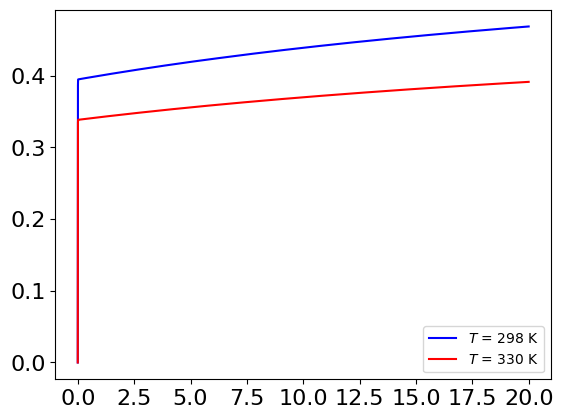

In [14]:
df1=pd.read_csv("rst/tension_constTrueStrainRate4e-5_T298.csv")
df2=pd.read_csv("rst/tension_constTrueStrainRate4e-5_T320.csv")
df3=pd.read_csv("rst/tension_constTrueStrainRate4e-5.csv")
df1=df1[df1["strain_yy"]<=0.20]
df2=df2[df2["strain_yy"]<=0.20]
df3=df3[df3["strain_yy"]<=0.20]
# df1=pd.read_csv("working_plastic.csv")
# df=pd.read_csv("testing4e-3.csv")
#plt.plot(df["strain_yy"]*100,df["stress_yy"],label=r'$\dot{s}=4e-3$')
# plt.plot(df1["strain_yy"]*100,df1["stress_yy"],label=r'$\dot{s}=4e-4$')
# plt.plot(df2["strain_yy"]*100,df2["stress_yy"],label=r'$\dot{s}=4e-5$')

plt.plot(df1["strain_yy"]*100,df1["stress_yy"],color='blue',label=r'$T$ = 298 K')
plt.plot(df2["strain_yy"]*100,df2["stress_yy"],color='red',label=r'$T$ = 330 K')
# plt.plot(df1["strain_yy"],df1["stress_yy"],label='4e-5')
plt.legend(loc='lower right')
plt.xticks(fontsize='16')
plt.yticks(fontsize='16')
plt.savefig("./rst/stress_vs_strain_at_diff_temp.png",dpi=300)
plt.show()




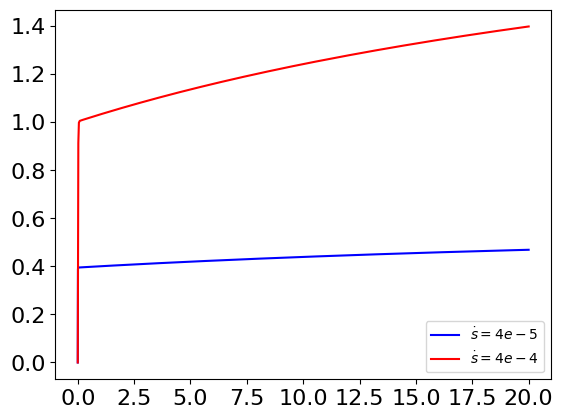

In [16]:
df1=pd.read_csv("rst/tension_constTrueStrainRate4e-5.csv")
df2=pd.read_csv("rst/tension_constTrueStrainRate4e-4.csv")
df3=pd.read_csv("rst/tension_constTrueStrainRate000.csv")
df1=df1[df1["strain_yy"]<=0.20]
df2=df2[df2["strain_yy"]<=0.20]
df3=df3[df3["strain_yy"]<=0.20]
# df1=pd.read_csv("working_plastic.csv")
# df=pd.read_csv("testing4e-3.csv")
#plt.plot(df["strain_yy"]*100,df["stress_yy"],label=r'$\dot{s}=4e-3$')
# plt.plot(df1["strain_yy"]*100,df1["stress_yy"],label=r'$\dot{s}=4e-4$')
# plt.plot(df2["strain_yy"]*100,df2["stress_yy"],label=r'$\dot{s}=4e-5$')

plt.plot(df1["strain_yy"]*100,df1["stress_yy"],color='blue',label=r'$\dot{s}=4e-5$')
plt.plot(df2["strain_yy"]*100,df2["stress_yy"],color='red',label=r'$\dot{s}=4e-4$')

# plt.plot(df1["strain_yy"],df1["stress_yy"],label='4e-5')
plt.legend(loc='lower right')
plt.xticks(fontsize='16')
plt.yticks(fontsize='16')
plt.savefig("./rst/stress_vs_strain_at_diff_strain_rate.png",dpi=300)
#plt.xscale("log")
#plt.savefig()
plt.show()


In [33]:
ls rst/

stress_vs_strain_at_diff_strain_rate.png
stress_vs_strain_at_diff_temp.png
tension_constTrueStrainRate000.csv
tension_constTrueStrainRate000.e
tension_constTrueStrainRate000_cp/
tension_constTrueStrainRate4e-3.csv
tension_constTrueStrainRate4e-3.e
tension_constTrueStrainRate4e-3_cp/
tension_constTrueStrainRate4e-4.csv
tension_constTrueStrainRate4e-5.csv
tension_constTrueStrainRate4e-5.e
tension_constTrueStrainRate4e-5_T298.csv
tension_constTrueStrainRate4e-5_T320.csv
tension_constTrueStrainRate4e-5_T320.e
tension_constTrueStrainRate4e-5_T320_cp/
tension_constTrueStrainRate4e-5_cp/


In [6]:
df

,time,strain_yy,stress_yy,u_z,von_mises
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.012500,0.000250,0.913076,0.001875,0.913076
2,0.025000,0.000500,0.997713,0.003751,0.997713
3,0.043750,0.000875,1.005098,0.006565,1.005098
4,0.071875,0.001437,1.007092,0.010789,1.007092
...,...,...,...,...,...
373,9.894582,0.197892,1.395164,1.641227,1.395164
374,9.909350,0.198187,1.395550,1.643928,1.395550
375,9.931504,0.198630,1.396105,1.647980,1.396105
376,9.964733,0.199295,1.396964,1.654062,1.396964


In [ ]:
hardening_exponent = 2.0
saturation_resistance = 2.0
initial_resistance = 0.95
hardening_modulus = 10.0
rate_exponent = 0.15
activation_energy = 37
gas_constant = 8.314462681e-3 # kJ/K/mol
saturation_exponent = 0.05
pre_factorAmp = 4.25e4
temperature = 298
# defination OF Prefactor
pre_factor_exp=pre_factorAmp*np.exp(-activation_energy/(gas_constant*temperature))
epsilon_rate=pre_factor_exp
shear_rate=epsilon_rate*np.sqrt(3.0)
shear_inital_resistance=initial_resistance/np.sqrt(3.0)
shear_saturation=saturation_resistance/np.sqrt(3.0)
shear_initial_hardness=hardening_modulus/3.0
##Step 1
## Initialization
hardening_variable=shear_initial_hardness
strength_variable=shear_inital_resistance
saturation_strength=shear_saturation
plastic_strain_rate=0.0
effective_plastic_strain=0.0
yield_strength=initial_resistance
# Does hardening/strength variable evolve?
##Step 2
#propagateTheProperties

#Step3
#InitializingStressCompute
#but why yield_strength is not propagating ? I bieleve material yield strength is fixed?
yield_strength=strength_variable*np.sqrt(3.0)


#Step 4
#iterationFinalize
#What is scaler?
if scalar>=0.0:
strength_variable=computeHardeningValue(scalar)







In [26]:
cd /home/ashokgrg19/projects/ecm_work/paper_nuhu_anodeDesign/MechTesting

/home/ashokgrg19/projects/ecm_work/paper_nuhu_anodeDesign/MechTesting


In [3]:
ls

 angle0.i            Figures/                     'rst\threeBlock_angle60.csv'
 angle15.i           IsoEffect.png                'rst\threeBlock_angle60.e'
 angle30.i           nuhuSample.msh               'rst\threeBlock_angle75.csv'
 angle45.i           nuhuSample_SymElec.msh       'rst\threeBlock_angle75.e'
 angle60.i           rst/                         'rst\threeBlock_angle90.csv'
 angle75.i          'rst\threeBlock_angle0.csv'   'rst\threeBlock_angle90.e'
 angle90.i          'rst\threeBlock_angle0.e'      threeBlock.geo
 anisoDiff.i        'rst\threeBlock_angle15.csv'   threeBlock.geo_unrolled
 anIsoEffect.png    'rst\threeBlock_angle15.e'     threeBlock.msh
 anisoIndep.i       'rst\threeBlock_angle30.csv'   threeBlock_NT.geo
 blockTesting.i     'rst\threeBlock_angle30.e'     threeBlock_NT.msh
 blockTesting_NT.i  'rst\threeBlock_angle45.csv'
 ecBeta-opt*        'rst\threeBlock_angle45.e'


In [27]:
import numpy as np
import pandas as pd
angles=np.arange(0,91,15)
sigmaXX=[]
sigmaYY=[]
sigmaXY=[]
for ik in angles:
    df=pd.read_csv("./rst/threeBlock_angle{}.csv".format(ik)).iloc[-1,:]
    sigmaXX.append(df['averageXX'])
    sigmaXY.append(df['averageXY'])
    sigmaYY.append(df['averageYY'])

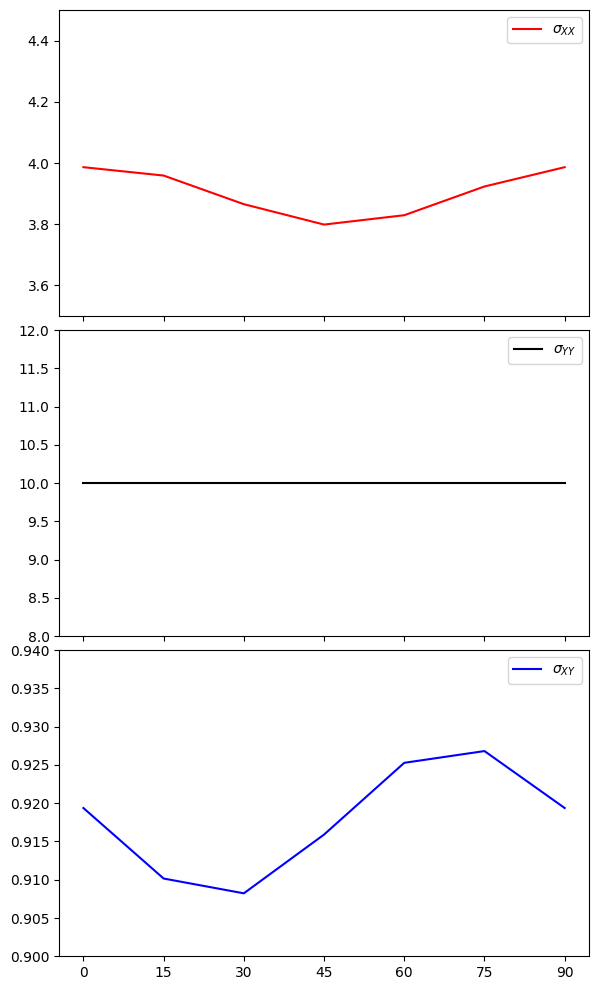

In [59]:
tick_start=0
tick_end=90
step_size=15
ticks=np.arange(tick_start,tick_end+1,step_size)
fig,axes=plt.subplots(nrows=3,ncols=1,figsize=(6,10),sharex=True)
axes[2].set_xticks(ticks)
axes[0].plot(angles,-np.array(sigmaXX)*1e-6,label=r'$\sigma_{XX}$',color='red')
axes[1].plot(angles,-np.array(sigmaYY)*1e-6,label=r'$\sigma_{YY}$',color='black')
axes[2].plot(angles,-np.array(sigmaXY)*1e-6,label=r'$\sigma_{XY}$',color='blue')
# #plt.plot(angles,-np.array(sigmaXX)*1e-6)

# plt.plot(angles,-np.array(sigmaYY)*1e-6)

# plt.ylim([5,15])

# plt.plot(angles,-np.array(sigmaXY)*1e-6)
# plt.ylim([0.90,0.94])
#plt.ylim([8,12])
#plt.plot(angles,sigmaYY)
# plt.plot(angles,sigmaXY)
axes[0].legend()
axes[1].legend()
axes[2].legend()

axes[0].set_ylim([3.5,4.5])
axes[1].set_ylim([8,12])
axes[2].set_ylim([0.90,0.94])
plt.subplots_adjust(hspace=0.5)
plt.tight_layout(h_pad=0.0) 

plt.savefig("EulerRotation.png",dpi=300)
plt.show()

In [42]:
-np.array(sigmaYY)*1e-6

array([10., 10., 10., 10., 10., 10., 10.])

In [60]:
cd rst/

/home/ashokgrg19/projects/ecm_work/paper_nuhu_anodeDesign/MechTesting/rst


In [61]:
ls

StressStrain_angle0.csv  threeBlock_angle30.csv  threeBlock_angle75.csv
StressStrain_angle0.e    threeBlock_angle30.e    threeBlock_angle75.e
threeBlock_angle0.csv    threeBlock_angle45.csv  threeBlock_angle90.csv
threeBlock_angle0.e      threeBlock_angle45.e    threeBlock_angle90.e
threeBlock_angle15.csv   threeBlock_angle60.csv
threeBlock_angle15.e     threeBlock_angle60.e


In [62]:
df_StressVsStrain=pd.read_csv("StressStrain_angle0.csv")

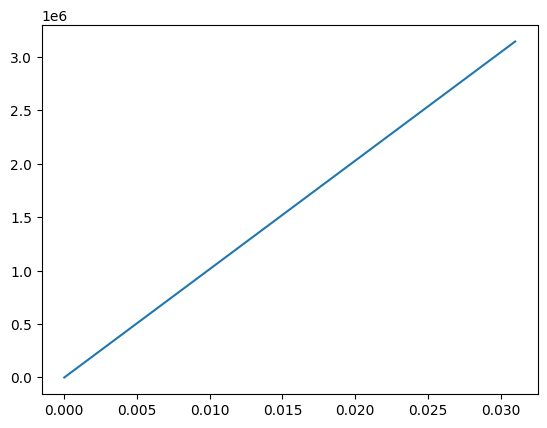

In [65]:
plt.plot(df_StressVsStrain["time"],df_StressVsStrain["averageXX"])